In [1]:
#importing the libraries
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
#importing the dataset
sick = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
sick = sick.drop(["id"], axis=1)
sick.head()
sick = sick.dropna()
print(sick.shape)

for i in sick.columns:
    if sick[i].dtype == "object":
        sick[i] = LabelEncoder().fit_transform(sick[i])

print(sick.shape)

x = sick.drop(["stroke"], axis=1)
y = sick["stroke"]

scaler = StandardScaler()
x = scaler.fit_transform(x)
print("shape of x: {}\nshape of y: {}".format(x.shape,y.shape))

(4909, 11)
(4909, 11)
shape of x: (4909, 10)
shape of y: (4909,)


In [3]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [4]:
#defining dataset class
from torch.utils.data import Dataset, DataLoader
class dataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x,dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32)
        self.length = self.x.shape[0]
    
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    def __len__(self):
        return self.length
trainset = dataset(x,y)
#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

In [5]:
#defining the network
from torch import nn
from torch.nn import functional as F
class Net(nn.Module):
    def __init__(self,input_shape):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_shape,32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64,1)
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [6]:
#hyper parameters
learning_rate = 0.05
epochs = 30
# Model , Optimizer, Loss
model = Net(input_shape=x.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

In [7]:
#forward loop
losses = []
accur = []
for i in range(epochs):
    for j,(x_train,y_train) in enumerate(trainloader):
    
        #calculate output
        output = model(x_train)

        #calculate loss
        loss = loss_fn(output,y_train.reshape(-1,1))

        #accuracy
        predicted = model(torch.tensor(x,dtype=torch.float32))
        acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
        
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(loss)
    accur.append(acc)
    print("epoch {}\tloss : {}".format(i,loss))
    
print("accuracy: ", acc)

epoch 0	loss : 0.05158217251300812
epoch 1	loss : 0.025516478344798088
epoch 2	loss : 0.021718494594097137
epoch 3	loss : 0.020620262250304222
epoch 4	loss : 0.020277423784136772
epoch 5	loss : 0.020226189866662025
epoch 6	loss : 0.020338771864771843
epoch 7	loss : 0.020508047193288803
epoch 8	loss : 0.020685849711298943
epoch 9	loss : 0.020870503038167953
epoch 10	loss : 0.021079881116747856
epoch 11	loss : 0.021383170038461685
epoch 12	loss : 0.021642521023750305
epoch 13	loss : 0.021909639239311218
epoch 14	loss : 0.022186962887644768
epoch 15	loss : 0.022368544712662697
epoch 16	loss : 0.022518722340464592
epoch 17	loss : 0.022672908380627632
epoch 18	loss : 0.02279038354754448
epoch 19	loss : 0.022953025996685028
epoch 20	loss : 0.02308768779039383
epoch 21	loss : 0.02321033738553524
epoch 22	loss : 0.023305559530854225
epoch 23	loss : 0.023392992094159126
epoch 24	loss : 0.02349340356886387
epoch 25	loss : 0.023564143106341362
epoch 26	loss : 0.023669933900237083
epoch 27	loss : 

Text(0, 0.5, 'loss')

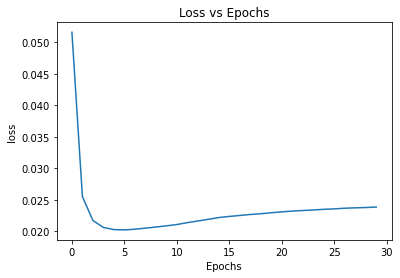

In [8]:
#plotting the loss
from torch.autograd import Variable
losses = torch.tensor(losses, requires_grad=True)
losses = Variable(losses, requires_grad=True)
losses = losses.detach().numpy()
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')